In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Permute

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
data = pd.read_csv("E:/Sriharini/Rice_Crop_Disease_Detection/RCDD_dataset1.csv")
data = data.sample(frac=1)

In [4]:
X=data.drop("Outcome",axis=1)
X

,BlueChannelMean,GreenChannelMean,RedChannelMean,Bluestdev,GreenStdev,RedStdev,AvgContourPerimeter,AvgContourArea,humoment1,humoment2,humoment3,humoment4,humoment5,humoment6,humoment7,GLCM_energy,GLCM_correlation,GLCM_dissimilarity,GLCM_homogeneity,GLCM_contrast
38,9.765730,13.326945,14.909488,36.355219,49.345662,55.174723,57.840589,137.128205,1.917058,3.842348,6.577328,6.601713,13.191234,8.523853,-16.333166,0.463135,0.699811,10.320120,0.489530,1040.776420
93,1.920892,2.930526,3.615261,13.067375,19.234560,23.599605,27.206608,51.985119,2.128892,4.409487,6.298241,6.387940,12.731036,8.593864,-15.059367,0.520033,0.742014,4.333928,0.568155,424.751773
33,7.299628,13.007341,16.511666,25.633266,44.082635,55.860200,28.332029,57.679752,2.186505,4.459278,7.337071,7.300747,14.619659,9.530447,17.044125,0.418922,0.738516,6.499095,0.473012,580.507511
97,2.045682,2.997758,3.843370,12.285536,17.583573,22.340472,31.866612,80.448276,2.283711,4.600909,8.910346,8.827594,17.701378,11.128676,-18.526107,0.576134,0.741452,4.150072,0.610426,351.628709
108,0.093127,0.399683,0.630534,1.249350,4.520925,6.981463,26.774824,30.066667,0.729441,1.518258,2.989738,3.070626,6.100808,3.829803,9.529315,0.262771,0.677174,11.486580,0.305898,668.187906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,1.566823,3.855801,5.240509,9.896212,22.585269,30.154169,172.740114,1557.000000,2.420722,4.907168,6.995348,7.034706,14.049737,9.492268,-16.440234,0.016906,0.722484,8.000594,0.126556,178.543432
48,0.869379,3.565043,5.261367,5.430945,18.823124,26.544824,108.038181,530.200000,1.672979,3.394769,5.866499,6.216790,12.274136,8.022543,12.836648,0.022403,0.742268,6.783110,0.140762,146.945439
87,1.296311,1.946833,2.439833,10.895808,16.058917,20.022148,241.089009,158.000000,1.296132,2.609984,4.488444,4.517866,9.021023,5.823335,11.478524,0.576425,0.747658,4.091538,0.606265,371.145833
102,1.416658,2.652370,3.471594,10.166864,17.466404,22.524248,25.346012,33.113426,1.965165,4.019338,7.078297,7.194160,14.331592,9.204002,15.459238,0.467019,0.723002,4.804259,0.522346,383.334314


In [5]:
Y=data["Outcome"]
print(Y)

38     1
93     3
33     1
97     3
108    3
      ..
49     2
48     2
87     3
102    3
51     2
Name: Outcome, Length: 120, dtype: int64


In [6]:
Y1 = Y.copy(deep = "True")
for i in range(len(Y)):
    if Y[i] != 1:
        Y1[i] = 0
    else:
        Y1[i] = 1
        
print(Y1)

38     1
93     0
33     1
97     0
108    0
      ..
49     0
48     0
87     0
102    0
51     0
Name: Outcome, Length: 120, dtype: int64


In [7]:
Y2 = Y.copy(deep = "True")
for i in range(len(Y)):
    if Y[i] != 2:
        Y2[i] = 0
    else:
        Y2[i] = 1
        
print(Y2)

38     0
93     0
33     0
97     0
108    0
      ..
49     1
48     1
87     0
102    0
51     1
Name: Outcome, Length: 120, dtype: int64


In [8]:
Y3 = Y.copy(deep = "True")
for i in range(len(Y)):
    if Y[i] != 3:
        Y3[i] = 0
    else:
        Y3[i] = 1
        
print(Y3)

38     0
93     1
33     0
97     1
108    1
      ..
49     0
48     0
87     1
102    1
51     0
Name: Outcome, Length: 120, dtype: int64


In [9]:
X.shape

(120, 20)

In [10]:
model1 = Sequential()
model1.add(Dense(64, input_dim=20, activation='relu',kernel_initializer='glorot_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='glorot_uniform'))
model1.add(Dense(1, activation='sigmoid'))
# Compile model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history1=model1.fit(X, Y1,validation_split=0.30, epochs=50)

Epoch 1/50
3/3 [==============================] - 1s 187ms/step - loss: 10.5878 - accuracy: 0.5119 - val_loss: 16.5468 - val_accuracy: 0.4444
Epoch 2/50
3/3 [==============================] - 0s 48ms/step - loss: 7.4008 - accuracy: 0.4405 - val_loss: 6.4494 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 0s 43ms/step - loss: 4.4772 - accuracy: 0.4881 - val_loss: 4.6847 - val_accuracy: 0.6111
Epoch 4/50
3/3 [==============================] - 0s 44ms/step - loss: 2.8872 - accuracy: 0.5000 - val_loss: 6.5732 - val_accuracy: 0.6389
Epoch 5/50
3/3 [==============================] - 0s 43ms/step - loss: 1.6927 - accuracy: 0.6310 - val_loss: 7.7897 - val_accuracy: 0.6667
Epoch 6/50
3/3 [==============================] - 0s 33ms/step - loss: 1.0289 - accuracy: 0.6071 - val_loss: 8.9249 - val_accuracy: 0.7500
Epoch 7/50
3/3 [==============================] - 0s 32ms/step - loss: 0.7916 - accuracy: 0.7024 - val_loss: 10.2286 - val_accuracy: 0.6944
Epoch 8/50
3/3 [=======

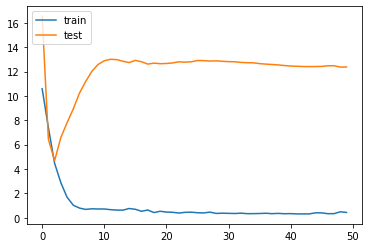

In [12]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [13]:
history2=model1.fit(X, Y2,validation_split=0.30, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 75ms/step - loss: 2.0891 - accuracy: 0.3214 - val_loss: 18.2402 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 48ms/step - loss: 2.2208 - accuracy: 0.4405 - val_loss: 17.4547 - val_accuracy: 0.3056
Epoch 3/100
3/3 [==============================] - 0s 47ms/step - loss: 2.0102 - accuracy: 0.2619 - val_loss: 17.4086 - val_accuracy: 0.5278
Epoch 4/100
3/3 [==============================] - 0s 44ms/step - loss: 2.1365 - accuracy: 0.6548 - val_loss: 16.7411 - val_accuracy: 0.5833
Epoch 5/100
3/3 [==============================] - 0s 48ms/step - loss: 1.5451 - accuracy: 0.3690 - val_loss: 15.7657 - val_accuracy: 0.4444
Epoch 6/100
3/3 [==============================] - 0s 49ms/step - loss: 0.8939 - accuracy: 0.5833 - val_loss: 16.0393 - val_accuracy: 0.5833
Epoch 7/100
3/3 [==============================] - 0s 41ms/step - loss: 0.9041 - accuracy: 0.6905 - val_loss: 15.5207 - val_accuracy: 0.4722
Epoch 8/100
3

Epoch 59/100
3/3 [==============================] - 0s 46ms/step - loss: 0.3768 - accuracy: 0.9048 - val_loss: 15.4860 - val_accuracy: 0.6944
Epoch 60/100
3/3 [==============================] - 0s 41ms/step - loss: 0.2732 - accuracy: 0.8571 - val_loss: 15.5880 - val_accuracy: 0.5833
Epoch 61/100
3/3 [==============================] - 0s 41ms/step - loss: 0.2738 - accuracy: 0.8810 - val_loss: 15.6511 - val_accuracy: 0.7222
Epoch 62/100
3/3 [==============================] - 0s 44ms/step - loss: 0.3261 - accuracy: 0.9048 - val_loss: 15.6520 - val_accuracy: 0.6389
Epoch 63/100
3/3 [==============================] - 0s 40ms/step - loss: 0.3242 - accuracy: 0.8452 - val_loss: 15.6581 - val_accuracy: 0.5833
Epoch 64/100
3/3 [==============================] - 0s 37ms/step - loss: 0.2771 - accuracy: 0.8929 - val_loss: 15.7124 - val_accuracy: 0.6667
Epoch 65/100
3/3 [==============================] - 0s 41ms/step - loss: 0.3439 - accuracy: 0.9167 - val_loss: 15.6280 - val_accuracy: 0.6389
Epoch 

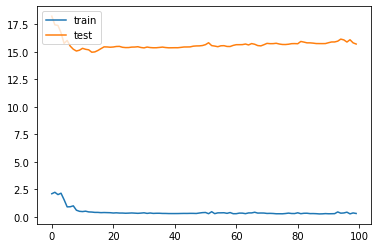

In [14]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [17]:
history3=model1.fit(X, Y3,validation_split=0.30, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 72ms/step - loss: 0.5114 - accuracy: 0.7738 - val_loss: 24.7606 - val_accuracy: 0.6111
Epoch 2/100
3/3 [==============================] - 0s 45ms/step - loss: 0.4605 - accuracy: 0.7381 - val_loss: 24.7834 - val_accuracy: 0.5833
Epoch 3/100
3/3 [==============================] - 0s 46ms/step - loss: 0.4913 - accuracy: 0.8095 - val_loss: 24.7981 - val_accuracy: 0.5556
Epoch 4/100
3/3 [==============================] - 0s 42ms/step - loss: 0.4627 - accuracy: 0.7619 - val_loss: 24.7008 - val_accuracy: 0.6111
Epoch 5/100
3/3 [==============================] - 0s 44ms/step - loss: 0.4413 - accuracy: 0.7976 - val_loss: 24.4839 - val_accuracy: 0.5833
Epoch 6/100
3/3 [==============================] - 0s 41ms/step - loss: 0.4137 - accuracy: 0.8095 - val_loss: 24.4041 - val_accuracy: 0.6111
Epoch 7/100
3/3 [==============================] - 0s 43ms/step - loss: 0.4120 - accuracy: 0.7857 - val_loss: 24.3343 - val_accuracy: 0.5556
Epoch 8/100
3

Epoch 59/100
3/3 [==============================] - 0s 39ms/step - loss: 0.3587 - accuracy: 0.8571 - val_loss: 24.9214 - val_accuracy: 0.6667
Epoch 60/100
3/3 [==============================] - 0s 45ms/step - loss: 0.3540 - accuracy: 0.8095 - val_loss: 25.0140 - val_accuracy: 0.6944
Epoch 61/100
3/3 [==============================] - 0s 44ms/step - loss: 0.3396 - accuracy: 0.8571 - val_loss: 25.0407 - val_accuracy: 0.6111
Epoch 62/100
3/3 [==============================] - 0s 40ms/step - loss: 0.3463 - accuracy: 0.8929 - val_loss: 24.8881 - val_accuracy: 0.6667
Epoch 63/100
3/3 [==============================] - 0s 44ms/step - loss: 0.3481 - accuracy: 0.8095 - val_loss: 24.9371 - val_accuracy: 0.6944
Epoch 64/100
3/3 [==============================] - 0s 45ms/step - loss: 0.3347 - accuracy: 0.8452 - val_loss: 25.0035 - val_accuracy: 0.6111
Epoch 65/100
3/3 [==============================] - 0s 38ms/step - loss: 0.3427 - accuracy: 0.8571 - val_loss: 24.9509 - val_accuracy: 0.6667
Epoch 

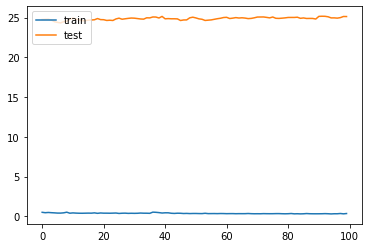

In [18]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')